## Практическая работа №6

### Анализ данных о покупках

Шаг 1. Импортировать необходимые библиотеки.
Шаг 2. Получить данные из файла https://github.com/OlesiaAngel/DataAnalitics/raw/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/dataset6_pr.csv
Шаг 3. Выполнить кластерный анализ с помощью алгоритма k-means.
Шаг 4. Постройть диаграмму рассеивания - scatter plot.
Шаг 5. Сформулировать выводы.
Шаг 6. Опубликовать файл расширения ipynb на платформе Odin.

Датасет - информация о покупках клиентов:

Товар - уникальный номер товара
Количество - количество купленных товаров
Сумма - объем продаж этого товара
Процент_продаж - доля продаж этого товара от общего объема продаж
Процент_колво - доля продаж этого товара от общего количества проданных товаров
Сумма_продаж- комулятивная сумма по объему продаж
Сумма_колво - комулятивная сумма по количеству проданных товаров

In [1]:
#Шаг 1. Импортировать необходимые библиотеки - библиотеки разместила по коду, чтобы запомнить применение
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Шаг 2. Получить данные из файла
df = pd.read_csv('https://github.com/OlesiaAngel/DataAnalitics/raw/main/%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5/dataset6_pr.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5293 non-null   int64  
 1   Товар           5293 non-null   float64
 2   Количество      5293 non-null   int64  
 3   Сумма           5293 non-null   float64
 4   Процент_продаж  5293 non-null   float64
 5   Процент_колво   5293 non-null   float64
 6   Сумма_продаж    5293 non-null   float64
 7   Сумма_колво     5293 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 330.9 KB


In [4]:
df.head()

,Unnamed: 0,Товар,Количество,Сумма,Процент_продаж,Процент_колво,Сумма_продаж,Сумма_колво
0,4744,4944.0,725,5092324.27,1.033086,1.537776,3.832430,1.537776
1,4714,4911.0,580,1823693.31,0.369975,1.230221,13.936921,2.767997
2,3366,3487.0,435,4566229.85,0.926357,0.922666,4.758786,3.690663
3,417,434.0,430,1747247.86,0.354466,0.912060,14.291388,4.602723
4,2542,2635.0,425,1211674.74,0.245814,0.901455,24.168217,5.504179


In [5]:
df = df.drop(columns ='Unnamed: 0')
df

,Товар,Количество,Сумма,Процент_продаж,Процент_колво,Сумма_продаж,Сумма_колво
0,4944.0,725,5092324.27,1.033086,1.537776,3.832430,1.537776
1,4911.0,580,1823693.31,0.369975,1.230221,13.936921,2.767997
2,3487.0,435,4566229.85,0.926357,0.922666,4.758786,3.690663
3,434.0,430,1747247.86,0.354466,0.912060,14.291388,4.602723
4,2635.0,425,1211674.74,0.245814,0.901455,24.168217,5.504179
...,...,...,...,...,...,...,...
5288,4533.0,1,10950.00,0.002221,0.002121,98.210857,99.991516
5289,4496.0,1,10950.00,0.002221,0.002121,98.208635,99.993637
5290,56.0,1,10960.00,0.002223,0.002121,98.206414,99.995758
5291,3289.0,1,11000.00,0.002232,0.002121,98.195275,99.997879


In [6]:
df.isnull().sum()

Товар             0
Количество        0
Сумма             0
Процент_продаж    0
Процент_колво     0
Сумма_продаж      0
Сумма_колво       0
dtype: int64

In [7]:
df.isna().sum()

Товар             0
Количество        0
Сумма             0
Процент_продаж    0
Процент_колво     0
Сумма_продаж      0
Сумма_колво       0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df[(df['Количество'] < 0) | (df['Сумма'] < 0)| (df['Процент_продаж'] < 0) | (df['Процент_колво'] < 0) | (df['Сумма_продаж'] < 0) | (df['Сумма_колво'] < 0)]

,Товар,Количество,Сумма,Процент_продаж,Процент_колво,Сумма_продаж,Сумма_колво


In [ ]:
#Шаг 3. Выполнить кластерный анализ с помощью алгоритма k-means.

In [10]:
from sklearn.preprocessing import normalize, MinMaxScaler, StandardScaler


In [11]:
df_sc = df.drop(columns ='Товар')
df_sc

,Количество,Сумма,Процент_продаж,Процент_колво,Сумма_продаж,Сумма_колво
0,725,5092324.27,1.033086,1.537776,3.832430,1.537776
1,580,1823693.31,0.369975,1.230221,13.936921,2.767997
2,435,4566229.85,0.926357,0.922666,4.758786,3.690663
3,430,1747247.86,0.354466,0.912060,14.291388,4.602723
4,425,1211674.74,0.245814,0.901455,24.168217,5.504179
...,...,...,...,...,...,...
5288,1,10950.00,0.002221,0.002121,98.210857,99.991516
5289,1,10950.00,0.002221,0.002121,98.208635,99.993637
5290,1,10960.00,0.002223,0.002121,98.206414,99.995758
5291,1,11000.00,0.002232,0.002121,98.195275,99.997879


In [12]:
sc = StandardScaler()
sc.fit(df_sc.select_dtypes('number'))

StandardScaler()

In [14]:
X = sc.fit_transform(df_sc.select_dtypes('number'))
X

array([[26.09701542, 18.14039738, 18.14039738, 26.09701542, -5.00856816,
        -5.14077014],
       [20.81268995,  6.27963922,  6.27963922, 20.81268995, -4.4055045 ,
        -5.06609164],
       [15.52836447, 16.23137836, 16.23137836, 15.52836447, -4.95328067,
        -5.01008276],
       ...,
       [-0.28816833, -0.29815792, -0.29815792, -0.28816833,  0.62392904,
         0.83595634],
       [-0.28816833, -0.29801278, -0.29801278, -0.28816833,  0.62326422,
         0.8360851 ],
       [-0.28816833, -0.33598673, -0.33598673, -0.28816833,  0.73097516,
         0.83621385]])

In [15]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5
0,26.097015,18.140397,18.140397,26.097015,-5.008568,-5.140770
1,20.812690,6.279639,6.279639,20.812690,-4.405504,-5.066092
2,15.528364,16.231378,16.231378,15.528364,-4.953281,-5.010083
3,15.346146,6.002244,6.002244,15.346146,-4.384349,-4.954718
4,15.163928,4.058830,4.058830,15.163928,-3.794873,-4.899996
...,...,...,...,...,...,...
5288,-0.288168,-0.298194,-0.298194,-0.288168,0.624194,0.835699
5289,-0.288168,-0.298194,-0.298194,-0.288168,0.624062,0.835828
5290,-0.288168,-0.298158,-0.298158,-0.288168,0.623929,0.835956
5291,-0.288168,-0.298013,-0.298013,-0.288168,0.623264,0.836085


In [16]:
X.columns = df_sc.select_dtypes('number').columns
X

,Количество,Сумма,Процент_продаж,Процент_колво,Сумма_продаж,Сумма_колво
0,26.097015,18.140397,18.140397,26.097015,-5.008568,-5.140770
1,20.812690,6.279639,6.279639,20.812690,-4.405504,-5.066092
2,15.528364,16.231378,16.231378,15.528364,-4.953281,-5.010083
3,15.346146,6.002244,6.002244,15.346146,-4.384349,-4.954718
4,15.163928,4.058830,4.058830,15.163928,-3.794873,-4.899996
...,...,...,...,...,...,...
5288,-0.288168,-0.298194,-0.298194,-0.288168,0.624194,0.835699
5289,-0.288168,-0.298194,-0.298194,-0.288168,0.624062,0.835828
5290,-0.288168,-0.298158,-0.298158,-0.288168,0.623929,0.835956
5291,-0.288168,-0.298013,-0.298013,-0.288168,0.623264,0.836085


In [17]:
X.describe().round(2)

,Количество,Сумма,Процент_продаж,Процент_колво,Сумма_продаж,Сумма_колво
count,5293.00,5293.00,5293.00,5293.00,5293.00,5293.00
mean,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.29,-0.34,-0.34,-0.29,-5.15,-5.14
25%,-0.29,-0.31,-0.31,-0.29,-0.24,-0.28
50%,-0.25,-0.25,-0.25,-0.25,0.42,0.40
75%,-0.07,-0.08,-0.08,-0.07,0.66,0.67
max,26.10,25.48,25.48,26.10,0.73,0.84


In [19]:
from sklearn.cluster import KMeans

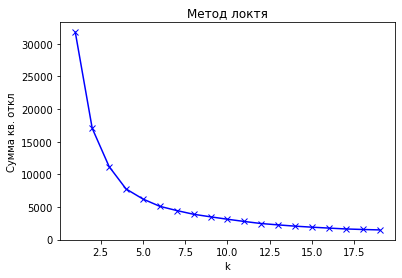

In [20]:
Sum_of_squared_distances = []
K = range(1, 20)
for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Сумма кв. откл')
plt.title('Метод локтя')
plt.show()

In [ ]:
по методу Локтя определяем, что оптимально выбрать 4 кластера

In [21]:
kmeans = KMeans(n_clusters = 4, random_state=0).fit(X)

predict = kmeans.predict(X)
df['Кластер'] = predict
df.head()

,Товар,Количество,Сумма,Процент_продаж,Процент_колво,Сумма_продаж,Сумма_колво,Кластер
0,4944.0,725,5092324.27,1.033086,1.537776,3.832430,1.537776,3
1,4911.0,580,1823693.31,0.369975,1.230221,13.936921,2.767997,3
2,3487.0,435,4566229.85,0.926357,0.922666,4.758786,3.690663,3
3,434.0,430,1747247.86,0.354466,0.912060,14.291388,4.602723,3
4,2635.0,425,1211674.74,0.245814,0.901455,24.168217,5.504179,3


In [26]:
kms = KMeans(n_clusters = 4, random_state = 1)
y_kmeans = kms.fit_predict(X) #Вычислить центры кластеров и предсказать индекс кластера для каждой выборки.


In [27]:
km.fit(X)

KMeans(n_clusters=4, random_state=1)

In [28]:
segment_kmeans = kms.fit_predict(X)

df_scaled = pd.DataFrame(X)

df_scaled['segment_kmeans'] = segment_kmeans
df_scaled['segment_kmeans'].value_counts() #посмотрим размеры получившихся кластеров


0    4199
1     928
2     155
3      11
Name: segment_kmeans, dtype: int64

<AxesSubplot:ylabel='segment_kmeans'>

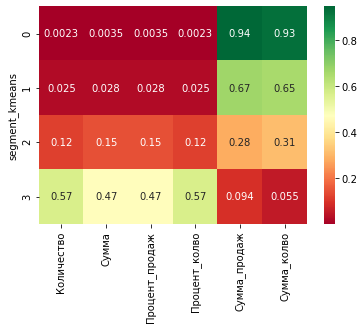

In [29]:
scaled_df = pd.DataFrame(X, columns=X.columns)
 
scaler = MinMaxScaler()
scaled_minmax = scaler.fit_transform(scaled_df)
   
    
scaled_df_minmax = pd.DataFrame(scaled_minmax, columns=X.columns)
                  
scaled_df_minmax['segment_kmeans'] = segment_kmeans

df_2_heatmap = scaled_df_minmax.groupby(scaled_df_minmax['segment_kmeans']).agg('mean')
sns.heatmap(df_2_heatmap, annot=df_2_heatmap, cmap="RdYlGn")

In [ ]:
#с помощью метода Локтя было определено 4 кластера, но в кластер 3 попало всего 11 объектов (0.2% от количества объектов), я думаю, что это - выбросы. 
#Остальные три кластера показывают разделение на группы по двум признакам: Сумма_продаж и Сумма_колво. 
#Построим диаграмму рассеивания, учитывая эти признаки

In [ ]:
#Шаг 4. Постройть диаграмму рассеивания - scatter plot.

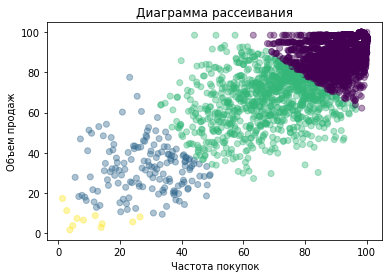

In [34]:
plt.scatter(df['Сумма_продаж'], df["Сумма_колво"], c = df['Кластер'], cmap='viridis', alpha = 0.4)
plt.xlabel('Частота покупок')
plt.ylabel('Объем продаж')
plt.title('Диаграмма рассеивания')
plt.show()

## Вывод: 
тепловая диаграмма показала, что основными признаками для кластеризации трех групп (кластер 0,1,2) являются:
    Сумма_продаж- комулятивная сумма по объему продаж
    Сумма_колво - комулятивная сумма по количеству проданных товаров
Построив диаграмму рассеивания по указанным двум признакам, видим четкое разделение групп, чем выше частота покупок, тем выше объем продаж